## Importing libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

## Importing the dataset

In [0]:
#dataset = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')

In [0]:
from google.colab import files

upload1 = files.upload()

Saving file.csv to file.csv


In [0]:
dataset = pd.read_csv(io.StringIO(upload1['file.csv'].decode('utf-8')))

In [0]:
print(dataset.shape)

(181691, 10)


## Understanding the dataset

In [0]:
dataset = dataset[["iyear","extended","region_txt","latitude","longitude","attacktype1_txt","targtype1_txt","weaptype1_txt","nkill","nwound"]]

In [0]:
dataset.shape #Only including relevant columns

(181691, 10)

In [0]:
dataset.columns

Index(['iyear', 'extended', 'region_txt', 'latitude', 'longitude',
       'attacktype1_txt', 'targtype1_txt', 'weaptype1_txt', 'nkill', 'nwound'],
      dtype='object')

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 10 columns):
iyear              181691 non-null int64
extended           181691 non-null int64
region_txt         181691 non-null object
latitude           177135 non-null float64
longitude          177134 non-null float64
attacktype1_txt    181691 non-null object
targtype1_txt      181691 non-null object
weaptype1_txt      181691 non-null object
nkill              171378 non-null float64
nwound             165380 non-null float64
dtypes: float64(4), int64(2), object(4)
memory usage: 13.9+ MB


In [0]:
dataset.describe()

,iyear,extended,latitude,longitude,nkill,nwound
count,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,0.045346,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,0.208063,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,0.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,0.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,0.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,1.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [0]:
dataset.head()

,iyear,extended,region_txt,latitude,longitude,attacktype1_txt,targtype1_txt,weaptype1_txt,nkill,nwound
0,1970,0,Central America & Caribbean,18.456792,-69.951164,Assassination,Private Citizens & Property,Unknown,1.0,0.0
1,1970,0,North America,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0
2,1970,0,Southeast Asia,15.478598,120.599741,Assassination,Journalists & Media,Unknown,1.0,0.0
3,1970,0,Western Europe,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Explosives,NaN,NaN
4,1970,0,East Asia,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN,NaN


In [0]:
dataset.sample(10)

,iyear,extended,region_txt,latitude,longitude,attacktype1_txt,targtype1_txt,weaptype1_txt,nkill,nwound
146045,2015,0,South Asia,30.475091,69.365678,Armed Assault,Police,Firearms,1.0,0.0
171397,2017,0,South Asia,18.965838,83.451666,Facility/Infrastructure Attack,Transportation,Sabotage Equipment,34.0,61.0
52333,1992,0,Middle East & North Africa,38.403111,37.956069,Armed Assault,Military,Firearms,3.0,0.0
171476,2017,0,Middle East & North Africa,36.354145,43.143570,Unknown,Military,Unknown,NaN,NaN
59505,1995,0,Sub-Saharan Africa,-7.365016,20.815942,Armed Assault,Government (Diplomatic),Firearms,0.0,2.0
7647,1979,0,Central America & Caribbean,12.432570,-86.881204,Assassination,Private Citizens & Property,Unknown,1.0,0.0
104155,2011,0,Middle East & North Africa,37.080181,41.220196,Armed Assault,Military,Firearms,1.0,1.0
165836,2016,0,Middle East & North Africa,18.223461,42.526051,Bombing/Explosion,Private Citizens & Property,Explosives,0.0,0.0
121050,2013,0,South Asia,31.823601,64.564087,Bombing/Explosion,Military,Explosives,2.0,1.0
67269,1997,0,Sub-Saharan Africa,-1.996892,29.706386,Armed Assault,Police,Firearms,5.0,0.0


## Data Preprocessing

#### Missing values

In [0]:
dataset = dataset.dropna() #Removing the incomplete columns entirely

In [0]:
dataset = dataset.reset_index()

#### Removing irrelevant feature

In [0]:
dataset = dataset.drop(["index"],axis=1)  #Irrelevant column

In [0]:
dataset.sample(10)

,iyear,extended,region_txt,latitude,longitude,attacktype1_txt,targtype1_txt,weaptype1_txt,nkill,nwound
68543,2006,0,Middle East & North Africa,36.836111,6.137778,Bombing/Explosion,Military,Explosives,0.0,1.0
18296,1985,0,Southeast Asia,14.679084,120.539549,Unknown,Utilities,Unknown,0.0,0.0
82795,2010,0,Middle East & North Africa,35.303047,44.329933,Assassination,Police,Explosives,0.0,3.0
111506,2014,0,South Asia,34.035533,70.574089,Bombing/Explosion,Private Citizens & Property,Explosives,1.0,6.0
152386,2017,0,Middle East & North Africa,41.106178,28.689863,Facility/Infrastructure Attack,Business,Incendiary,0.0,0.0
44892,1994,0,Sub-Saharan Africa,-33.652523,26.407557,Assassination,Private Citizens & Property,Firearms,1.0,0.0
54369,1997,0,South America,6.675200,-74.842110,Hostage Taking (Kidnapping),Government (General),Firearms,0.0,0.0
76678,2008,0,South Asia,28.630806,69.186259,Bombing/Explosion,Utilities,Explosives,0.0,0.0
46803,1994,0,Middle East & North Africa,41.106178,28.689863,Unknown,Police,Unknown,0.0,1.0
93787,2012,0,Southeast Asia,6.391460,101.517296,Armed Assault,Military,Explosives,2.0,1.0


In [0]:
## There is a noticeable number of columns with "Unknown" values

#### Removing insignificant values

In [0]:
dataset = dataset[dataset["attacktype1_txt"]!="Unknown"]

In [0]:
dataset = dataset[dataset["targtype1_txt"]!="Unknown"]

In [0]:
dataset = dataset[dataset["weaptype1_txt"]!="Unknown"]

In [0]:
dataset.sample(10)

,iyear,extended,region_txt,latitude,longitude,attacktype1_txt,targtype1_txt,weaptype1_txt,nkill,nwound
20986,1986,0,South America,5.538128,-73.362191,Armed Assault,Private Citizens & Property,Firearms,5.0,0.0
81760,2010,0,Middle East & North Africa,36.354145,43.143570,Assassination,Government (General),Explosives,0.0,3.0
130372,2015,0,South Asia,34.317813,70.772254,Armed Assault,Police,Firearms,2.0,0.0
84880,2010,0,Southeast Asia,6.717959,101.593027,Armed Assault,Private Citizens & Property,Firearms,5.0,3.0
48696,1995,0,South Asia,23.791275,90.418205,Armed Assault,Transportation,Incendiary,0.0,0.0
152065,2017,0,Middle East & North Africa,36.201721,37.143520,Bombing/Explosion,NGO,Explosives,3.0,7.0
114496,2014,0,Sub-Saharan Africa,0.053700,40.307877,Bombing/Explosion,Airports & Aircraft,Explosives,0.0,0.0
70085,2007,0,South Asia,34.916628,68.802411,Assassination,Government (General),Explosives,0.0,6.0
87590,2011,0,South Asia,25.578773,91.893254,Armed Assault,Business,Firearms,0.0,6.0
14105,1983,0,South America,-16.509317,-68.104340,Bombing/Explosion,Government (General),Explosives,0.0,0.0


#### Combining similar columns

In [0]:
dataset["impact"] = dataset["nkill"]+dataset["nwound"]

In [0]:
dataset = dataset.drop("nkill", axis=1)
dataset = dataset.drop("nwound", axis=1)

In [0]:
dataset.sample(10)

,iyear,extended,region_txt,latitude,longitude,attacktype1_txt,targtype1_txt,weaptype1_txt,impact
105108,2013,0,Middle East & North Africa,26.200018,50.463268,Bombing/Explosion,Private Citizens & Property,Explosives,3.0
27032,1988,0,South America,-16.099091,-70.278122,Assassination,Government (General),Firearms,1.0
120037,2014,0,Middle East & North Africa,34.438094,35.830837,Armed Assault,Military,Firearms,7.0
30808,1989,0,South America,5.616667,-54.400000,Armed Assault,Telecommunication,Firearms,0.0
159829,2017,0,South Asia,27.189105,87.022444,Assassination,Violent Political Party,Explosives,1.0
157228,2017,0,South Asia,32.434830,69.001649,Armed Assault,Police,Firearms,77.0
11996,1982,0,Central America & Caribbean,14.563479,-90.982067,Armed Assault,Military,Firearms,22.0
20912,1986,0,South America,-11.967368,-76.978462,Assassination,Military,Firearms,3.0
148353,2016,0,Middle East & North Africa,38.516459,40.545739,Armed Assault,Military,Explosives,5.0
63084,2003,0,South Asia,34.153695,74.667536,Armed Assault,Private Citizens & Property,Firearms,2.0


#### Dealing with Categorical data

In [0]:
# Checking the number of unique categories of each categorical feature

print("The number of unique regions are: "+str(dataset['region_txt'].nunique()))
print("The number of unique attacks are: "+str(dataset['attacktype1_txt'].nunique()))
print("The number of unique targets are: "+str(dataset['targtype1_txt'].nunique()))
print("The number of unique weapons are: "+str(dataset['weaptype1_txt'].nunique()))

The number of unique regions are: 12
The number of unique attacks are: 8
The number of unique targets are: 21
The number of unique weapons are: 11


In [0]:
dataset = pd.concat([dataset, pd.get_dummies(dataset['region_txt'], prefix='reg')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['attacktype1_txt'], prefix='atck')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['targtype1_txt'], prefix='targ')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['weaptype1_txt'], prefix='wpn')], axis=1)

In [0]:
dataset = dataset.drop(["region_txt"],axis=1)
dataset = dataset.drop(["attacktype1_txt"],axis=1)
dataset = dataset.drop(["targtype1_txt"],axis=1)
dataset = dataset.drop(["weaptype1_txt"],axis=1)

In [0]:
dataset.shape

(143940, 57)

In [0]:
dataset.sample(10)

,iyear,extended,latitude,longitude,impact,reg_Australasia & Oceania,reg_Central America & Caribbean,reg_Central Asia,reg_East Asia,reg_Eastern Europe,...,wpn_Chemical,wpn_Explosives,wpn_Fake Weapons,wpn_Firearms,wpn_Incendiary,wpn_Melee,wpn_Other,wpn_Radiological,wpn_Sabotage Equipment,"wpn_Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
10760,1981,0,4.667128,-74.106056,1.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9123,1980,0,26.200605,92.937574,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
13328,1983,0,6.091880,-75.636150,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
137235,2015,0,54.085787,13.864722,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
109710,2013,0,10.725533,122.552480,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
34889,1990,0,-29.906897,-71.251030,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
72280,2008,0,31.499713,65.000854,2.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3356,1977,0,37.742242,-25.674950,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
149165,2016,0,31.250196,34.241280,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
14107,1983,0,-11.967368,-76.978462,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


#### Anaysing the "Impact" feature

In [0]:
dataset["impact"].describe()

count    143940.000000
mean          5.536543
std          44.752296
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max        9574.000000
Name: impact, dtype: float64

In [0]:
dataset["impact"].skew()

156.62155926656342

Text(0, 0.5, 'Count')

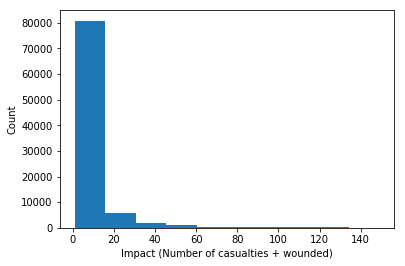

In [0]:
plt.hist(dataset["impact"])
plt.xlabel("Impact (Number of casualties + wounded)")
plt.ylabel("Count")

###### Clearly, the impact feature lies majorly below 200. Let's confine the feature to remove any outliers 

In [0]:
dataset = dataset[dataset["impact"]<150]
dataset = dataset[dataset["impact"]>0]

In [0]:
# Checking the number many number of kills/wounded people:

dataset["impact"].value_counts()

1.0      26799
2.0      13791
3.0       9208
4.0       6802
5.0       5153
6.0       3829
7.0       3287
8.0       2566
9.0       2120
10.0      1828
11.0      1443
12.0      1191
13.0       987
15.0       878
14.0       859
16.0       717
17.0       618
20.0       582
18.0       553
19.0       439
21.0       402
22.0       385
23.0       335
25.0       303
24.0       295
30.0       286
27.0       253
26.0       245
28.0       238
29.0       173
         ...  
125.0        8
123.0        7
109.0        7
124.0        7
132.0        7
83.0         7
133.0        6
114.0        6
121.0        6
131.0        6
140.0        6
119.0        5
128.0        5
148.0        5
141.0        5
143.0        5
116.0        4
144.0        4
129.0        4
122.0        4
139.0        4
146.0        3
149.0        3
145.0        3
137.0        2
136.0        2
117.0        1
23.5         1
147.0        1
16.5         1
Name: impact, Length: 151, dtype: int64

In [0]:
dataset.shape

(90778, 57)

## Correlation analysis

In [0]:
dataset.corr()

,iyear,extended,latitude,longitude,impact,reg_Australasia & Oceania,reg_Central America & Caribbean,reg_Central Asia,reg_East Asia,reg_Eastern Europe,...,wpn_Chemical,wpn_Explosives,wpn_Fake Weapons,wpn_Firearms,wpn_Incendiary,wpn_Melee,wpn_Other,wpn_Radiological,wpn_Sabotage Equipment,"wpn_Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
iyear,1.000000,0.040645,0.223131,0.006771,-0.001960,-0.031645,-0.347516,-0.025339,-0.021063,0.020556,...,0.008150,0.244620,NaN,-0.238790,-0.031998,-0.004055,0.008009,NaN,-0.003294,0.012740
extended,0.040645,1.000000,-0.016047,0.000465,0.003566,-0.001414,-0.017032,0.002794,-0.007075,0.003483,...,-0.005957,-0.115115,NaN,0.088602,0.003980,0.074474,0.009997,NaN,-0.001729,-0.004645
latitude,0.223131,-0.016047,1.000000,0.002452,0.013110,-0.079883,-0.127114,0.059696,0.028351,0.213964,...,0.014365,0.210211,NaN,-0.209627,-0.028161,0.007688,-0.005178,NaN,-0.007504,0.016551
longitude,0.006771,0.000465,0.002452,1.000000,0.000592,0.000110,-0.016638,0.000199,0.000182,0.000539,...,0.000143,0.003312,NaN,-0.003639,0.000361,0.000601,0.000080,NaN,0.000041,0.000109
impact,-0.001960,0.003566,0.013110,0.000592,1.000000,-0.005809,0.007789,-0.006164,0.018062,-0.021413,...,0.046599,0.192609,NaN,-0.179817,-0.008044,-0.045560,-0.005656,NaN,0.016700,0.002602
reg_Australasia & Oceania,-0.031645,-0.001414,-0.079883,0.000110,-0.005809,1.000000,-0.005956,-0.001750,-0.001510,-0.004815,...,0.016108,-0.015312,NaN,0.010740,0.000147,0.007367,-0.000718,NaN,-0.000369,0.010145
reg_Central America & Caribbean,-0.347516,-0.017032,-0.127114,-0.016638,0.007789,-0.005956,1.000000,-0.011816,-0.010195,-0.032515,...,-0.008584,-0.148153,NaN,0.158931,-0.007878,-0.021860,-0.004847,NaN,0.006712,0.000162
reg_Central Asia,-0.025339,0.002794,0.059696,0.000199,-0.006164,-0.001750,-0.011816,1.000000,-0.002995,-0.009552,...,0.001870,-0.008074,NaN,0.006927,-0.001305,0.004372,-0.001424,NaN,-0.000732,-0.001966
reg_East Asia,-0.021063,-0.007075,0.028351,0.000182,0.018062,-0.001510,-0.010195,-0.002995,1.000000,-0.008242,...,0.043590,-0.002127,NaN,-0.037948,0.054354,0.066568,-0.001229,NaN,-0.000631,0.017854
reg_Eastern Europe,0.020556,0.003483,0.213964,0.000539,-0.021413,-0.004815,-0.032515,-0.009552,-0.008242,1.000000,...,0.001222,0.013178,NaN,-0.011944,-0.005012,0.001004,-0.003919,NaN,-0.002014,-0.005411


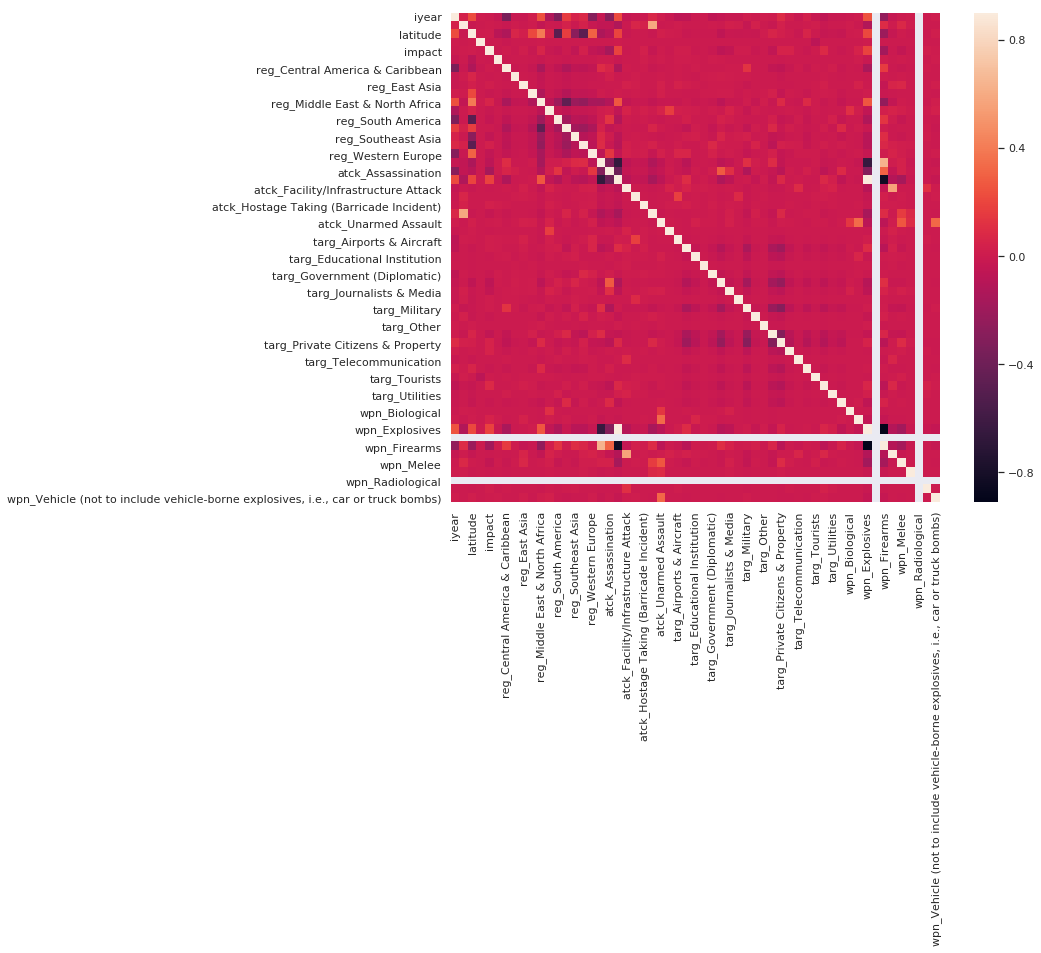

In [0]:
corrmat = dataset.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [0]:
dataset.corr()["impact"].abs().sort_values(ascending=False)

impact                                                                             1.000000
atck_Bombing/Explosion                                                             0.192721
wpn_Explosives                                                                     0.192609
wpn_Firearms                                                                       0.179817
atck_Assassination                                                                 0.161917
targ_Transportation                                                                0.084008
atck_Armed Assault                                                                 0.071646
targ_Government (General)                                                          0.066488
reg_Middle East & North Africa                                                     0.054318
targ_Police                                                                        0.053478
reg_Southeast Asia                                                              

## Training and Testing data split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
predictors = dataset.drop("impact",axis=1)
target = dataset["impact"]

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=1)

##### Therefore, the training set will have 72,622 examples, while the Testing set will have 18,156 examples.

In [0]:
X_train.shape

(72622, 56)

In [0]:
Y_train.shape

(72622,)

In [0]:
X_test.shape

(18156, 56)

In [0]:
Y_test.shape

(18156,)

## Model Fitting

In [0]:
from sklearn.metrics import mean_absolute_error

accuracy_scores = [1,2,3,4,5]

### Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lr = LinearRegression()

lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
Y_pred_lr = lr.predict(X_test)

Text(0, 0.5, 'Target Labels')

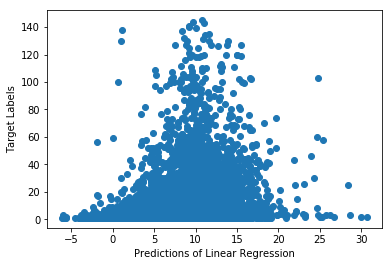

In [0]:
plt.scatter(Y_pred_lr,Y_test)
plt.xlabel("Predictions of Linear Regression")
plt.ylabel("Target Labels")

In [0]:
accuracy_scores[0] = mean_absolute_error(Y_test,Y_pred_lr)
print(accuracy_scores[0])

6.6408724895616515


### Decision Tree

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
dt = DecisionTreeRegressor(random_state=42)

dt.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [0]:
Y_pred_dt = dt.predict(X_test)

Text(0, 0.5, 'Target Labels')

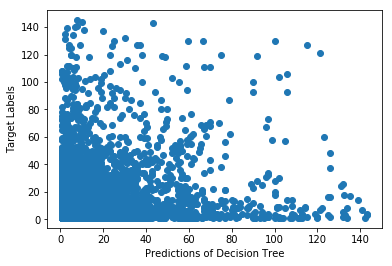

In [0]:
plt.scatter(Y_pred_dt,Y_test)
plt.xlabel("Predictions of Decision Tree")
plt.ylabel("Target Labels")

In [0]:
accuracy_scores[1] = mean_absolute_error(Y_test,Y_pred_dt)
print(accuracy_scores[1])

6.946091432448082


### Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)

rf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [0]:
Y_pred_rf = rf.predict(X_test)

Text(0, 0.5, 'Target Labels')

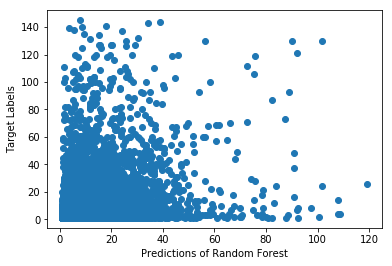

In [0]:
plt.scatter(Y_pred_rf,Y_test)
plt.xlabel("Predictions of Random Forest")
plt.ylabel("Target Labels")

In [0]:
accuracy_scores[2] = mean_absolute_error(Y_test,Y_pred_rf)
print(accuracy_scores[2])

6.220620649939352


### XGBoost Regression

In [0]:
import xgboost as xgb

In [0]:
model_xgb = xgb.XGBRegressor()

model_xgb.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [0]:
Y_pred_xgb = model_xgb.predict(X_test)

Text(0, 0.5, 'Target Labels')

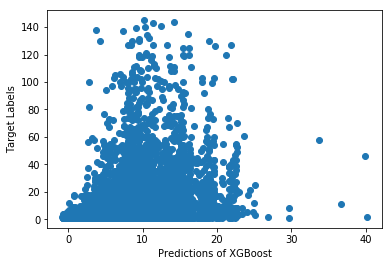

In [0]:
plt.scatter(Y_pred_xgb,Y_test)
plt.xlabel("Predictions of XGBoost")
plt.ylabel("Target Labels")

In [0]:
accuracy_scores[3] = mean_absolute_error(Y_test,Y_pred_xgb)
print(accuracy_scores[3])

6.341275831114474


### Neural Network

In [0]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

Using TensorFlow backend.


In [0]:

model = Sequential()
model.add(Dense(16,kernel_initializer='normal',activation='relu',input_dim=56))
model.add(Dense(16,kernel_initializer='normal',activation='relu'))
model.add(Dense(16,kernel_initializer='normal',activation='relu'))
model.add(Dense(16,kernel_initializer='normal',activation='relu'))
model.add(Dense(1,kernel_initializer='normal',activation='linear'))

model.compile(loss="mean_absolute_error",optimizer='adam',metrics=['mean_absolute_error'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                912       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 1,745
Trainable params: 1,745
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(X_train, Y_train, epochs=10)


Instructions for updating:
Use tf.cast instead.
Epoch 1/10
72622/72622 [==============================] - 10s 140us/step - loss: 5.9986 - mean_absolute_error: 5.9986
Epoch 2/10
72622/72622 [==============================] - 8s 106us/step - loss: 7.8124 - mean_absolute_error: 7.8124
Epoch 3/10
72622/72622 [==============================] - 8s 105us/step - loss: 5.9274 - mean_absolute_error: 5.9274
Epoch 4/10
72622/72622 [==============================] - 8s 105us/step - loss: 5.7079 - mean_absolute_error: 5.7079
Epoch 5/10
72622/72622 [==============================] - 8s 104us/step - loss: 6.9321 - mean_absolute_error: 6.9321
Epoch 6/10
72622/72622 [==============================] - 8s 105us/step - loss: 5.9473 - mean_absolute_error: 5.9473
Epoch 7/10
72622/72622 [==============================] - 8s 105us/step - loss: 5.7055 - mean_absolute_error: 5.7055
Epoch 8/10
72622/72622 [==============================] - 8s 107us/step - loss: 6.0097 - mean_absolute_error: 6.0097
Epoch 9/10
7262

Epoch 1/20
72622/72622 [==============================] - 8s 104us/step - loss: 5.6252 - mean_absolute_error: 5.6252
Epoch 2/20
72622/72622 [==============================] - 8s 105us/step - loss: 5.6873 - mean_absolute_error: 5.6873
Epoch 3/20
72622/72622 [==============================] - 8s 105us/step - loss: 5.6142 - mean_absolute_error: 5.6142
Epoch 4/20
72622/72622 [==============================] - 8s 105us/step - loss: 6.4190 - mean_absolute_error: 6.4190
Epoch 5/20
72622/72622 [==============================] - 8s 104us/step - loss: 5.6800 - mean_absolute_error: 5.6800
Epoch 6/20
72622/72622 [==============================] - 8s 104us/step - loss: 5.8022 - mean_absolute_error: 5.8022
Epoch 7/20
72622/72622 [==============================] - 8s 106us/step - loss: 5.6858 - mean_absolute_error: 5.6858
Epoch 8/20
72622/72622 [==============================] - 8s 104us/step - loss: 5.6972 - mean_absolute_error: 5.6972
Epoch 9/20
72622/72622 [==============================] - 8s 112

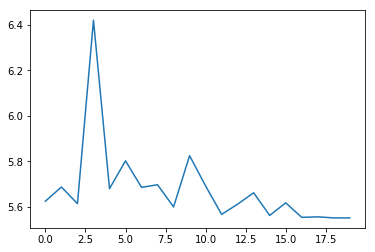

In [0]:
history = model.fit(X_train, Y_train, epochs=20)

plt.plot(history.history['mean_absolute_error'])

Text(0.5, 0, 'Epochs')

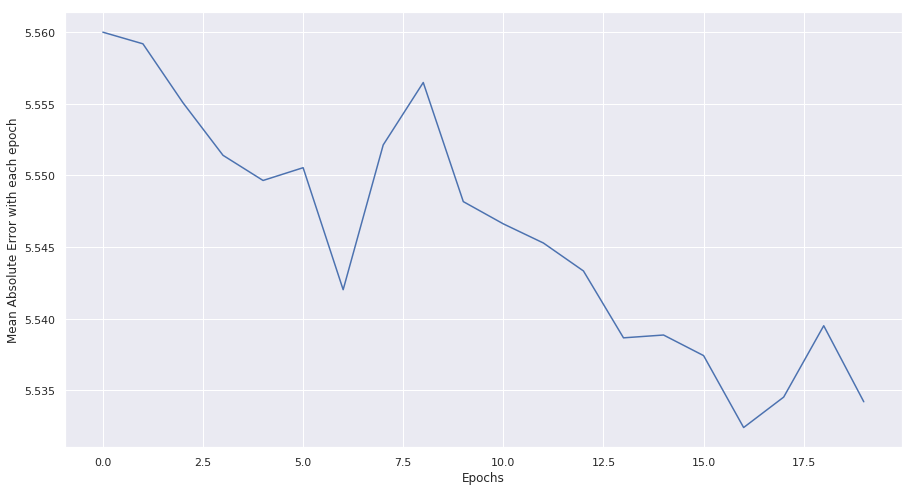

In [0]:
plt.plot(history.history['mean_absolute_error'])
plt.ylabel("Mean Absolute Error with each epoch")
plt.xlabel("Epochs")

In [0]:
Y_pred_nn = model.predict(X_test)

Text(0, 0.5, 'Target Labels')

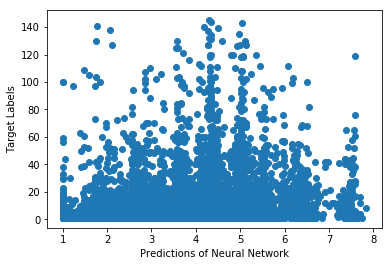

In [0]:
plt.scatter(Y_pred_nn,Y_test)
plt.xlabel("Predictions of Neural Network")
plt.ylabel("Target Labels")

In [0]:
accuracy_scores[4] = mean_absolute_error(Y_test,Y_pred_dt)
print(accuracy_scores[4])

6.946091432448082


## Support Vector Regression

In [0]:
from sklearn.svm import SVR

In [0]:
svr = SVR()

svr.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
Y_pred_svr = svr.predict(X_test)

In [0]:
score_svr = mean_absolute_error(Y_test,Y_pred_svr)
print(score_svr)

5.162115473134497


Text(0, 0.5, 'Target Labels')

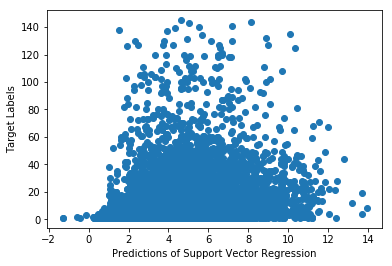

In [0]:
plt.scatter(Y_pred_svr,Y_test)
plt.xlabel("Predictions of Support Vector Regression")
plt.ylabel("Target Labels")

## Evaluation of models

In [0]:
print("The mean absolute error of Linear Regression is: "+str(accuracy_scores[0]))
print("The mean absolute error of Decision Tree is: "+str(accuracy_scores[1]))
print("The mean absolute error of Random Forest is: "+str(accuracy_scores[2]))
print("The mean absolute error of XGBoost Regressor is: "+str(accuracy_scores[3]))
print("The mean absolute error of Neural Networkis: "+str(accuracy_scores[4]))

The mean absolute error of Linear Regression is: 1
The mean absolute error of Decision Tree is: 2
The mean absolute error of Random Forest is: 3
The mean absolute error of XGBoost Regressor is: 4
The mean absolute error of Neural Networkis: 5


In [0]:
score_lr = mean_absolute_error(Y_test,Y_pred_lr)
score_dt = mean_absolute_error(Y_test,Y_pred_dt)
score_rf = mean_absolute_error(Y_test,Y_pred_rf)
score_xgb = mean_absolute_error(Y_test,Y_pred_xgb)
score_nn = mean_absolute_error(Y_test,Y_pred_nn)
score_svr = mean_absolute_error(Y_test,Y_pred_svr)

In [0]:
scores = [score_lr,score_svr,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Linear Regression","Support Vector Regression","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Linear Regression is: 6.6408724895616515 %
The accuracy score achieved using Support Vector Regression is: 5.162115473134497 %
The accuracy score achieved using Decision Tree is: 6.946091432448082 %
The accuracy score achieved using Random Forest is: 6.220620649939352 %
The accuracy score achieved using XGBoost is: 6.341275831114474 %
The accuracy score achieved using Neural Network is: 5.35996419211058 %


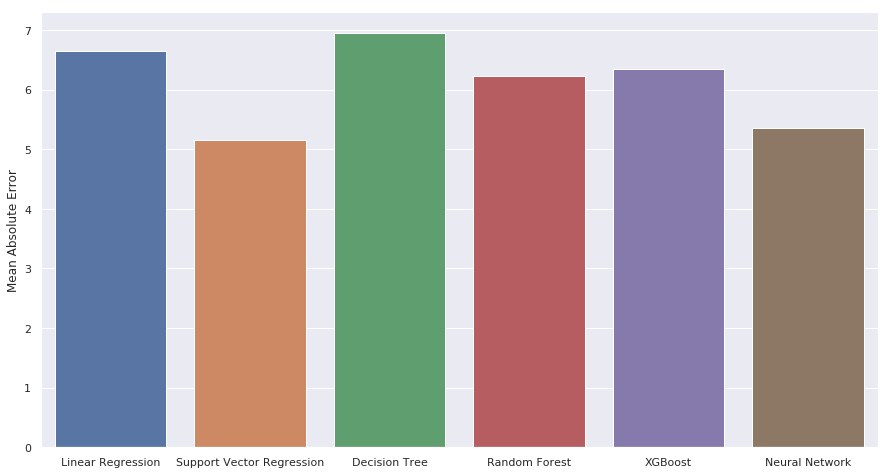

In [0]:

sns.set(rc={'figure.figsize':(15,8)})
plt.ylabel("Mean Absolute Error")

sns.barplot(algorithms,scores)

### r2 score

In [0]:
from sklearn.metrics import r2_score

In [0]:
r2_score_lr = r2_score(Y_test,Y_pred_lr)
r2_score_svr = r2_score(Y_test,Y_pred_svr)
r2_score_dt = r2_score(Y_test,Y_pred_dt)
r2_score_rf = r2_score(Y_test,Y_pred_rf)
r2_score_xgb = r2_score(Y_test,Y_pred_xgb)
r2_score_nn = r2_score(Y_test,Y_pred_nn)

In [0]:
r2_scores = [r2_score_lr,r2_score_svr,r2_score_dt,r2_score_rf,r2_score_xgb,r2_score_nn]

for i in range(len(algorithms)):
    print("The r2 accuracy score achieved using "+algorithms[i]+" is: "+str(r2_scores[i]))

The r2 accuracy score achieved using Linear Regression is: 0.074352157516137
The r2 accuracy score achieved using Support Vector Regression is: 0.00463644975569355
The r2 accuracy score achieved using Decision Tree is: -0.41983452007784394
The r2 accuracy score achieved using Random Forest is: 0.02471009587009121
The r2 accuracy score achieved using XGBoost is: 0.1075164683469122
The r2 accuracy score achieved using Neural Network is: -0.04540484253321364


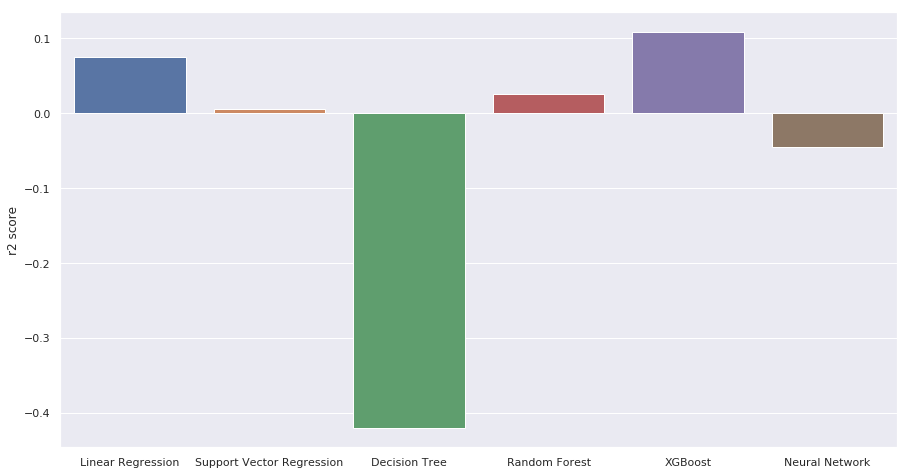

In [0]:
sns.set(rc={'figure.figsize':(15,8)})
plt.ylabel("r2 score")

sns.barplot(algorithms,r2_scores)

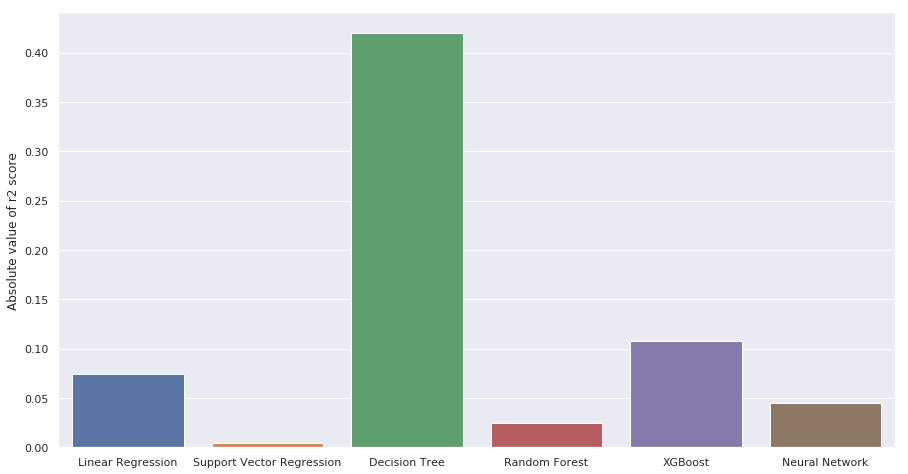

In [0]:
sns.set(rc={'figure.figsize':(15,8)})
plt.ylabel("Absolute value of r2 score")

r2_scores[2] = abs(r2_scores[2])
r2_scores[5] = abs(r2_scores[5])

sns.barplot(algorithms,r2_scores)

### RMSE

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [0]:
rmse_lr = sqrt(mean_squared_error(Y_test, Y_pred_lr))
rmse_svr = sqrt(mean_squared_error(Y_test, Y_pred_svr))
rmse_dt = sqrt(mean_squared_error(Y_test, Y_pred_dt))
rmse_rf = sqrt(mean_squared_error(Y_test, Y_pred_rf))
rmse_xgb = sqrt(mean_squared_error(Y_test, Y_pred_xgb))
rmse_nn = sqrt(mean_squared_error(Y_test, Y_pred_nn))

In [0]:
rmse_scores = [rmse_lr,rmse_svr,rmse_dt,rmse_rf,rmse_xgb,rmse_nn]

for i in range(len(algorithms)):
    print("The RMSE accuracy score achieved using "+algorithms[i]+" is: "+str(rmse_scores[i]))

The RMSE accuracy score achieved using Linear Regression is: 12.441219068593874
The RMSE accuracy score achieved using Support Vector Regression is: 12.901223745292507
The RMSE accuracy score achieved using Decision Tree is: 15.408448322859352
The RMSE accuracy score achieved using Random Forest is: 12.770470700763669
The RMSE accuracy score achieved using XGBoost is: 12.216312854886363
The RMSE accuracy score achieved using Neural Network is: 13.221547648804938


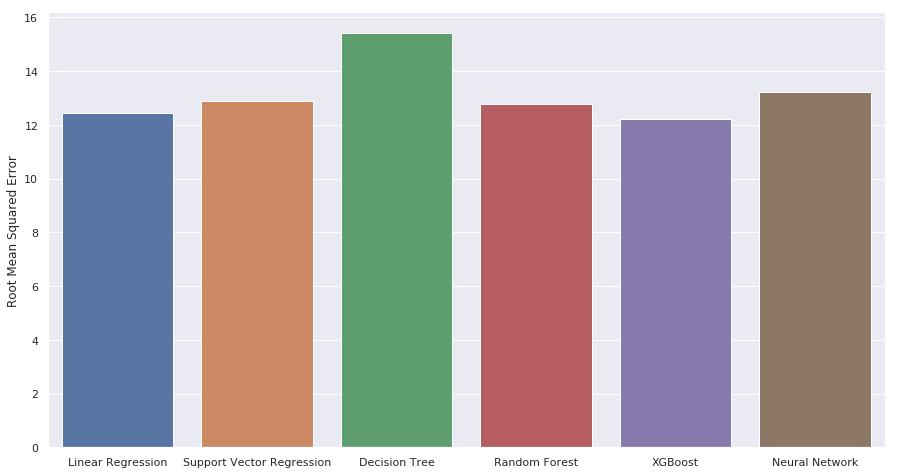

In [0]:
sns.set(rc={'figure.figsize':(15,8)})
plt.ylabel("Root Mean Squared Error")

sns.barplot(algorithms,rmse_scores)